<center><h1>Clean Room Vs Messy Room Classifier </h1></center>

In [48]:
# Idea from https://twitter.com/RahulJha2404/status/1300940204077801473
import os
from utils.helper import is_clean

In [49]:
# Download the dataset from here: https://github.com/Rahul240499/Clean-vs-Messy-Room-Classification/tree/master/dataset
dataset_path = os.path.join('dataset/')

In [50]:
data_path = dataset_path + 'clean_and_messy_images/'

no_images_dataset = len(os.listdir(data_path))
no_val_images_dataset = int((15 * no_images_dataset) / 100)
no_train_images_dataset = no_images_dataset - no_val_images_dataset

print("No. of images in dataset: ", no_images_dataset)
print("No. of images to train the model: ", no_train_images_dataset)
print("No. of images in validation set will be : ", no_val_images_dataset)

No. of images in dataset:  212
No. of images to train the model:  181
No. of images in validation set will be :  31


In [51]:
from fastai.vision.all import *
path = os.path.join(dataset_path, 'clean_and_messy_images')


'''
Our clean and messy images are in the same folder.
Clean room images are named as "Clean_1.jpg" i.e the first character is in uppercase 
and the messy rooms images are named as "messy_1.jpg 
here the first character is not uppercase" '''



# The ImageDataLoaders will take all the images from the specified path and transform it as well as resize it  

dls = ImageDataLoaders.from_name_func(
    '', get_image_files(path), valid_pct=0.15, seed=42,
    label_func=is_clean, item_tfms=Resize(224))


In [41]:
model = cnn_learner(dls, resnet18, metrics=error_rate)
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.306958,1.809025,0.516129,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.713400,0.582828,0.290323,00:00


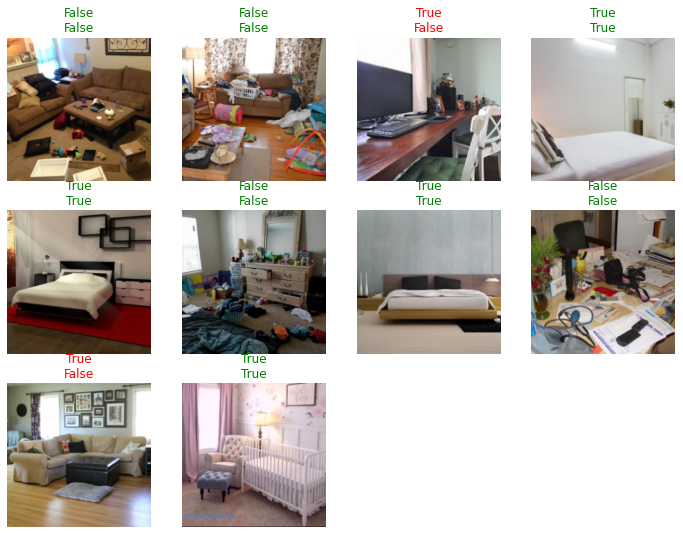

In [42]:
model.show_results(max_n=10)

In [43]:
test_dir = dataset_path + 'test/'

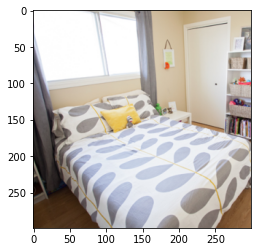

Is this clean?: False.
It's Clean: 43.06765365600586%  Not Clean: 56.93234634399414%


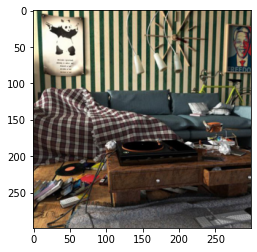

Is this clean?: False.
It's Clean: 0.45878100395202637%  Not Clean: 99.54121398925781%


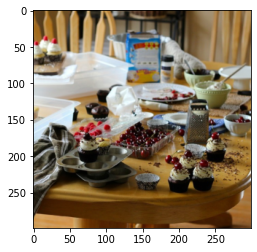

Is this clean?: False.
It's Clean: 0.03650811314582825%  Not Clean: 99.96348571777344%


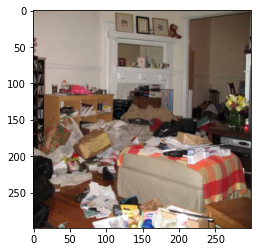

Is this clean?: False.
It's Clean: 2.3221707344055176%  Not Clean: 97.67782592773438%


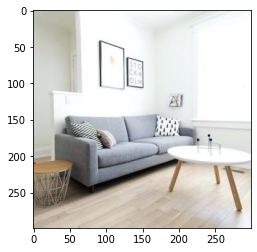

Is this clean?: True.
It's Clean: 92.83014678955078%  Not Clean: 7.169858932495117%


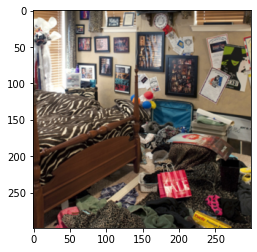

Is this clean?: False.
It's Clean: 0.9998417496681213%  Not Clean: 99.00015258789062%


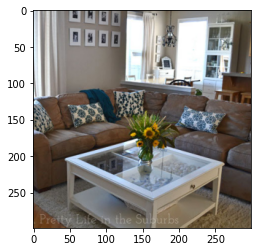

Is this clean?: True.
It's Clean: 67.82061767578125%  Not Clean: 32.17938232421875%


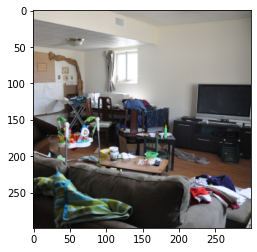

Is this clean?: False.
It's Clean: 9.234071731567383%  Not Clean: 90.76593017578125%


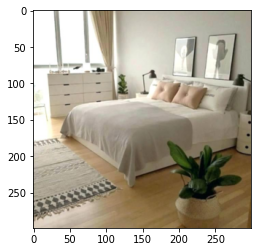

Is this clean?: False.
It's Clean: 5.819605827331543%  Not Clean: 94.18038940429688%


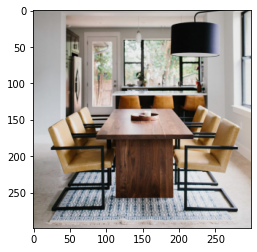

Is this clean?: True.
It's Clean: 66.3385009765625%  Not Clean: 33.66150665283203%


In [44]:
# Predictions for the images in the test dir
%matplotlib inline

test_images_list = os.listdir(test_dir)

for img in test_images_list:
  sn = SimpleNamespace(data = [test_dir + img])
  img = PILImage.create(sn.data[0])
  plt.figure()
  plt.imshow(img)
  plt.show()
  is_clean,_,probs = model.predict(img)
  print(f"Is this clean?: {is_clean}.")
  print(f"It's Clean: {probs[1] * 100}%  Not Clean: {probs[0] * 100}%")

In [45]:
# Saving the model
os.makedirs("models", exist_ok=True)
model.export('models/model_v0.pkl')

In [47]:
model = load_learner('models/model_v0.pkl')